<a href="https://colab.research.google.com/github/0xVolt/cemetery-of-culture/blob/main/year-3/neural-networks/5-cnns/complete-cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using a ConvNet training it on the CIFAR10 dataset

The CIFAR10 dataset contains 60,000 32x32 3 channel images and is used largely to train ConvNets for Image Classification. We import this dataset from TensorFlow. To know more about the CIFAR10 and the more advanced CIFAR100 datasets, visit [this website](https://www.cs.toronto.edu/~kriz/cifar.html).

## Structuring PyTorch script files
Here's a general purpose template for how to implement models using the PyTorch library.
1. Import dependencies. Some essential libraries include,
    - For data manipulation
        1. `numpy as np`
    - For plotting
        2. `matplotlib.pyplot as plt`
    - To build the neural network
        3. `torch`
        4. `torch.nn as nn`
        4. `torch.nn.functional as F`
    - To download the dataset (optional)
        5. `torchvision`
        5. `torchvision.transforms as transforms`
2. Make sure you've got gpu support, if not cpu. You configure the device like so,
    ```py
    device = torch.device('cuda' if torch.cuda.isavailable() else 'cpu')
    ```
3. Define the hyper-parameters for the model to be implemented. These include,
   1. Number of epochs
   2. Batch size
   3. Learning rate
4. Load the dataset (either by the modules imported or download).
5. Load the dataloader so we can use batch optimisation and training.
6. Define the target classes.
7. Define a class for the ConvNet.
8. Create the model. We do this by calling the class we defined as,
    ```py
    model = ConvNet.to(device)
    ```
9. Create the loss. For a multiclass classification, we use `nn.CrossEntropyLoss()`
10. Create optimiser. For this model we'll use the Stochastic Gradient Descent optimisation algorithm from `torch.optim.SGD(model.parameters, lr=learning_rate)`
11. Now comes your run of the mill training loop that loops over number of epochs and then in each epoch, loop through the batches. After training we display that the training of the model is complete.
12. Use train_loader 

## Code

Files already downloaded and verified
Files already downloaded and verified


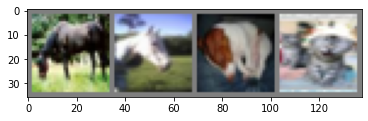

Epoch [1/5], Step [2000/12500], Loss: 2.2606
Epoch [1/5], Step [4000/12500], Loss: 2.3214
Epoch [1/5], Step [6000/12500], Loss: 2.2776
Epoch [1/5], Step [8000/12500], Loss: 2.2322
Epoch [1/5], Step [10000/12500], Loss: 2.0678
Epoch [1/5], Step [12000/12500], Loss: 2.0664
Epoch [2/5], Step [2000/12500], Loss: 2.1678
Epoch [2/5], Step [4000/12500], Loss: 1.3232
Epoch [2/5], Step [6000/12500], Loss: 1.9204
Epoch [2/5], Step [8000/12500], Loss: 2.2616
Epoch [2/5], Step [10000/12500], Loss: 1.9362
Epoch [2/5], Step [12000/12500], Loss: 1.2883
Epoch [3/5], Step [2000/12500], Loss: 1.7523
Epoch [3/5], Step [4000/12500], Loss: 1.5574
Epoch [3/5], Step [6000/12500], Loss: 1.7517
Epoch [3/5], Step [8000/12500], Loss: 1.0549
Epoch [3/5], Step [10000/12500], Loss: 1.5203
Epoch [3/5], Step [12000/12500], Loss: 1.3955
Epoch [4/5], Step [2000/12500], Loss: 2.0694
Epoch [4/5], Step [4000/12500], Loss: 1.6435
Epoch [4/5], Step [6000/12500], Loss: 1.1851
Epoch [4/5], Step [8000/12500], Loss: 1.7613
Epoc

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))


class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print(
                f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')
